In [210]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Task 1: Data Preprocessing

In [3]:
df = pd.read_csv('/Users/saipranavkrovvidi/Documents/Masters Sem 1/FDA/Projects/Project 2/Dataset/data.csv', encoding="ISO-8859-1")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# Calculating the percentage of missing values for each column
print("\n Percentage of Missing values in each column:")
print((df.isnull().sum()/len(df))*100)


 Percentage of Missing values in each column:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


Handling Missing Values Strategy:
CustomerID (24.93% missing values)

The CustomerID column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.

Description (0.27% missing values)

The Description column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same StockCode does not always have the same Description. This indicates data quality issues and potential errors in the product descriptions.



In [11]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [12]:
print("\n Percentage of Missing values in each column:")
print((df.isnull().sum()/len(df))*100)


 Percentage of Missing values in each column:
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


#### Handling Duplicate Values

In [14]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [15]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [16]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

In [259]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## Task 2: RFM Calculation
#### Recency (R)

In [19]:
current_date = df['InvoiceDate'].max()

In [20]:
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (current_date - recency['InvoiceDate']).dt.days
recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


#### Frequency (f)

In [22]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


#### Monetary (m)

In [24]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [25]:
# Combine all RFM metrics
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

# Display the first few rows of the RFM dataframe
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


## Task 3: RFM Segmentation

In [27]:
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,2,0.00,3.865741,39.387008,39.387008
1,12347.0,1,7,4310.00,97.719907,81.427264,81.427264
2,12348.0,74,4,1797.24,38.182870,64.249771,64.249771
3,12349.0,18,1,1757.55,72.974537,15.027447,15.027447
4,12350.0,309,1,334.40,5.578704,15.027447,15.027447


In [28]:
rfm['RFM_Score'] = 0.15*rfm['R_rank_norm'] + 0.28*rfm['F_rank_norm'] + 0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm[['CustomerID', 'RFM_Score']]

,CustomerID,RFM_Score
0,12346.0,1.70
1,12347.0,4.19
2,12348.0,3.02
3,12349.0,1.19
4,12350.0,0.68
...,...,...
4367,18280.0,0.70
4368,18281.0,0.79
4369,18282.0,2.97
4370,18283.0,4.73


In [29]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346.0,325,2,0.00,3.87,39.39,39.39,1.70
1,12347.0,1,7,4310.00,97.72,81.43,81.43,4.19
2,12348.0,74,4,1797.24,38.18,64.25,64.25,3.02
3,12349.0,18,1,1757.55,72.97,15.03,15.03,1.19
4,12350.0,309,1,334.40,5.58,15.03,15.03,0.68
...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,8.38,15.03,15.03,0.70
4368,18281.0,180,1,80.82,19.99,15.03,15.03,0.79
4369,18282.0,7,3,176.60,87.63,54.33,54.33,2.97
4370,18283.0,3,16,2045.53,92.87,94.84,94.84,4.73


## Task 4 Customer Segmentation

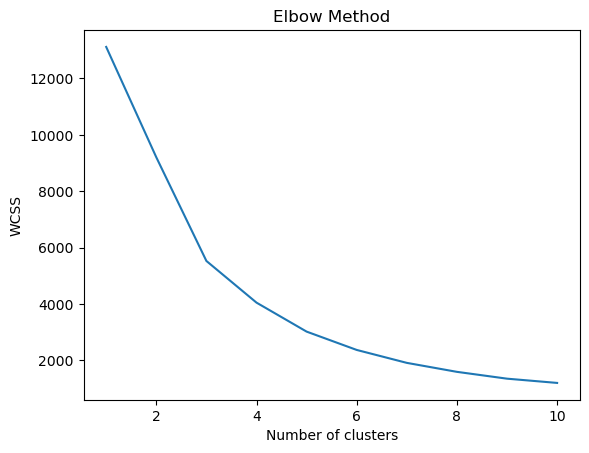

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
0,12346.0,325,2,0.00,3.87,39.39,39.39,1.70,2
1,12347.0,1,7,4310.00,97.72,81.43,81.43,4.19,0
2,12348.0,74,4,1797.24,38.18,64.25,64.25,3.02,0
3,12349.0,18,1,1757.55,72.97,15.03,15.03,1.19,0
4,12350.0,309,1,334.40,5.58,15.03,15.03,0.68,2
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,8.38,15.03,15.03,0.70,2
4368,18281.0,180,1,80.82,19.99,15.03,15.03,0.79,2
4369,18282.0,7,3,176.60,87.63,54.33,54.33,2.97,0
4370,18283.0,3,16,2045.53,92.87,94.84,94.84,4.73,0


In [31]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k = 4

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_
rfm

In [32]:
features = ['Recency', 'Frequency', 'Monetary']
X = rfm[features]
# Defining the number of clusters

k = 4

# Applying KMeans clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

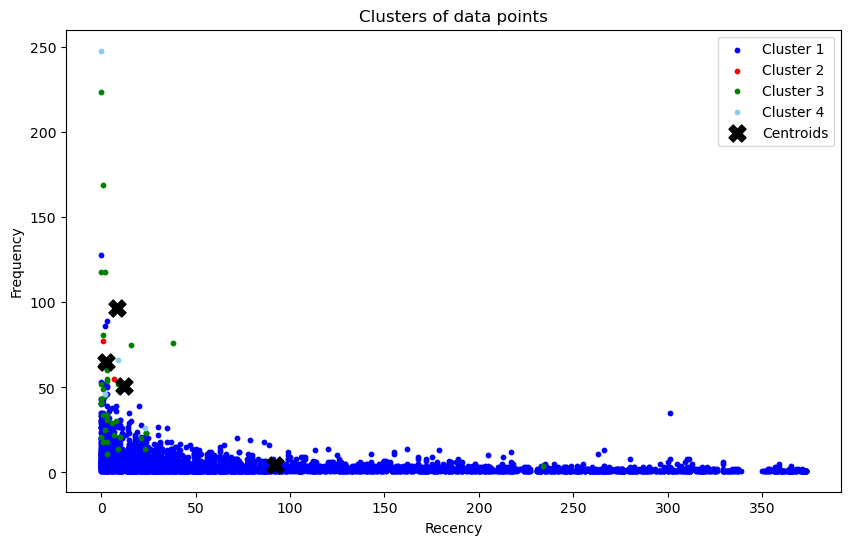

In [33]:
# Visualizing the clusters and centroids
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=10, c='blue', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=10, c='red', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=10, c='skyblue', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', marker='X', label='Centroids')
plt.legend()
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title("Clusters of data points")
plt.show()

## Task 5: Segment Profiling

In [35]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] >4.5, "Top Customers", 
                                    (np.where(rfm['RFM_Score'] > 4,"High value Customer",
                                    (np.where(rfm['RFM_Score'] > 3,"Medium Value Customer",
                                     np.where(rfm['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
rfm[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,1.70,Low Value Customers
1,12347.0,4.19,High value Customer
2,12348.0,3.02,Medium Value Customer
3,12349.0,1.19,Lost Customers
4,12350.0,0.68,Lost Customers
5,12352.0,4.27,High value Customer
6,12353.0,0.77,Lost Customers
7,12354.0,0.74,Lost Customers
8,12355.0,0.76,Lost Customers
9,12356.0,2.83,Low Value Customers


## Task 6: Marketing Recommendations:

Segment 0 Recommendations:
1. Offer exclusive loyalty program to encourage purchases and increase frequency.
2. Send personalized product recommendations based on searching patterns and previous purchase with special offers to tempt them back.
3. Run email or SMS campaigns to keep them connected with the brand.


Segment 1 Recommendations:
1. Recognize and reward their loyalty with member points or exclusive access to new products and events.
2. Suggest complementary products to increase their order value.
3. Ask for their feedback on products purchased and services to further tailor your offerings.


Segment 2 Recommendations:
1. Recommend higher-value products or bundles to increase their spend.
2. Create promotions for limited-time offers to pull them to make more frequent purchases.
3. Share content that shows the benefits of your products to boost their value.


Segment 3 Recommendations:
1. Send targeted campaigns with attracting offers.
2. Identify the reasons for their non-purchase and develop strategies to win them back.
3. Ask for feedback and work on improving the aspects that pushed them away from purchasing.

In [37]:
# marketing recommendations for each customer segment
marketing_recommendations = {
    'Top Customers': {
        'Retention': 'Focus on retaining these customers through loyalty programs and exclusive offers.',
        'Upsell': 'Identify complementary products and offer bundle deals to increase sales.',
    },
    'High Value Customers': {
        'Promotions': 'Offer incentives to encourage additional purchases and discounts on related products.',
        'Personalization': 'Use purchase history for personalized product recommendations.',
    },
    'Medium Value Customers': {
        'Win-Back Campaigns': 'Target inactive customers with special promotions to reactivate them.',
        'Subscription Models': 'Introduce subscription services to ensure steady revenue.',
    },
    'Low Value Customers': {
        'Customer Education': 'Provide informative content to help customers understand product value.',
        'Reactivation Campaigns': 'Create reactivation campaigns with exclusive offers.',
    }
}

# recommendations based on customer cluster
def get_recommendations(cluster):
    if cluster in marketing_recommendations:
        return marketing_recommendations[cluster]
    else:
        return {'General Recommendations': 'Collect customer feedback and conduct A/B testing for optimization.'}

# Apply recommendations 
rfm['Marketing_Recommendations'] = rfm['Cluster'].apply(get_recommendations)

rfm[['CustomerID', 'Cluster', 'Marketing_Recommendations']]

,CustomerID,Cluster,Marketing_Recommendations
0,12346.0,2,{'General Recommendations': 'Collect customer ...
1,12347.0,0,{'General Recommendations': 'Collect customer ...
2,12348.0,0,{'General Recommendations': 'Collect customer ...
3,12349.0,0,{'General Recommendations': 'Collect customer ...
4,12350.0,2,{'General Recommendations': 'Collect customer ...
...,...,...,...
4367,18280.0,2,{'General Recommendations': 'Collect customer ...
4368,18281.0,2,{'General Recommendations': 'Collect customer ...
4369,18282.0,0,{'General Recommendations': 'Collect customer ...
4370,18283.0,0,{'General Recommendations': 'Collect customer ...


## Task 7: Visualization

In [39]:
total_quantity=df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_quantity.rename(columns={'InvoiceNo': 'total_quantity'}, inplace=True)
rfm = pd.merge(rfm, total_quantity, on='CustomerID')
rfm

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster,Customer_segment,Marketing_Recommendations,Quantity
0,12346.0,325,2,0.00,3.87,39.39,39.39,1.70,2,Low Value Customers,{'General Recommendations': 'Collect customer ...,0
1,12347.0,1,7,4310.00,97.72,81.43,81.43,4.19,0,High value Customer,{'General Recommendations': 'Collect customer ...,2458
2,12348.0,74,4,1797.24,38.18,64.25,64.25,3.02,0,Medium Value Customer,{'General Recommendations': 'Collect customer ...,2341
3,12349.0,18,1,1757.55,72.97,15.03,15.03,1.19,0,Lost Customers,{'General Recommendations': 'Collect customer ...,631
4,12350.0,309,1,334.40,5.58,15.03,15.03,0.68,2,Lost Customers,{'General Recommendations': 'Collect customer ...,197
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,8.38,15.03,15.03,0.70,2,Lost Customers,{'General Recommendations': 'Collect customer ...,45
4368,18281.0,180,1,80.82,19.99,15.03,15.03,0.79,2,Lost Customers,{'General Recommendations': 'Collect customer ...,54
4369,18282.0,7,3,176.60,87.63,54.33,54.33,2.97,0,Low Value Customers,{'General Recommendations': 'Collect customer ...,98
4370,18283.0,3,16,2045.53,92.87,94.84,94.84,4.73,0,Top Customers,{'General Recommendations': 'Collect customer ...,1357


In [40]:
rfm['Average_Transaction_Value']=rfm['Monetary']/rfm['Quantity']
rfm

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster,Customer_segment,Marketing_Recommendations,Quantity,Average_Transaction_Value
0,12346.0,325,2,0.00,3.87,39.39,39.39,1.70,2,Low Value Customers,{'General Recommendations': 'Collect customer ...,0,NaN
1,12347.0,1,7,4310.00,97.72,81.43,81.43,4.19,0,High value Customer,{'General Recommendations': 'Collect customer ...,2458,1.753458
2,12348.0,74,4,1797.24,38.18,64.25,64.25,3.02,0,Medium Value Customer,{'General Recommendations': 'Collect customer ...,2341,0.767723
3,12349.0,18,1,1757.55,72.97,15.03,15.03,1.19,0,Lost Customers,{'General Recommendations': 'Collect customer ...,631,2.785341
4,12350.0,309,1,334.40,5.58,15.03,15.03,0.68,2,Lost Customers,{'General Recommendations': 'Collect customer ...,197,1.697462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,8.38,15.03,15.03,0.70,2,Lost Customers,{'General Recommendations': 'Collect customer ...,45,4.013333
4368,18281.0,180,1,80.82,19.99,15.03,15.03,0.79,2,Lost Customers,{'General Recommendations': 'Collect customer ...,54,1.496667
4369,18282.0,7,3,176.60,87.63,54.33,54.33,2.97,0,Low Value Customers,{'General Recommendations': 'Collect customer ...,98,1.802041
4370,18283.0,3,16,2045.53,92.87,94.84,94.84,4.73,0,Top Customers,{'General Recommendations': 'Collect customer ...,1357,1.507391


   Cluster  Average_Recency  Average_Products_Purchased  Average_Transactions  \
0        0           128682                     2849537                 15219   
1        1              900                     1223395                  4474   
2        2           268436                      278764                  1963   
3        3               40                      541155                   534   

   Average_Spend  Average_Transaction_Value  Customer_Count  
0     4666838.15                        inf            3169  
1     2027922.97                 220.053046             110  
2      491109.85                        inf            1087  
3     1092648.45                  13.442450               6  


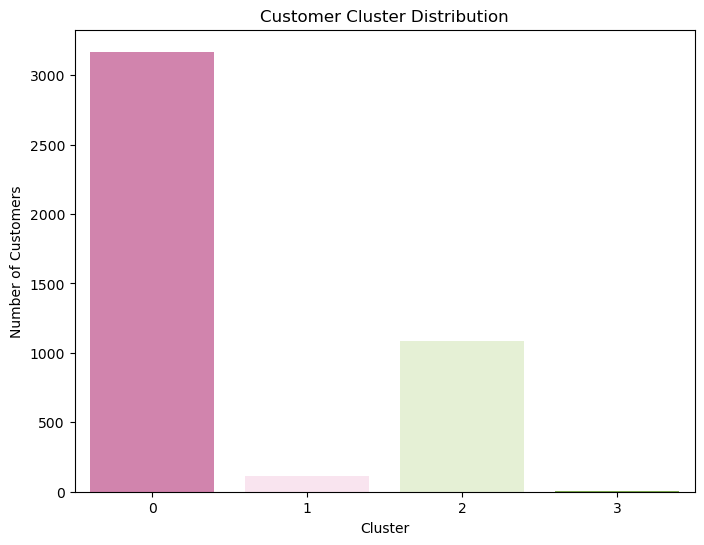

In [286]:
# Group customers by their assigned clusters
cs = rfm.groupby('Cluster').agg({
    'Recency': 'sum',
    'Quantity': 'sum',
    'Frequency': 'sum',
    'Monetary': 'sum',
    'Average_Transaction_Value': 'sum',
    'CustomerID': 'count'  # Number of customers in each cluster
}).reset_index()

# Rename columns 
cs = cs.rename(columns={
    'Recency': 'Average_Recency',
    'Quantity': 'Average_Products_Purchased',
    'Frequency': 'Average_Transactions',
    'Monetary': 'Average_Spend',
    'Average_Transaction_Value': 'Average_Transaction_Value',
    'CustomerID': 'Customer_Count'
})

print(cs)

# Visualize using bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Customer_Count', data=cs, palette='PiYG')
plt.title('Customer Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


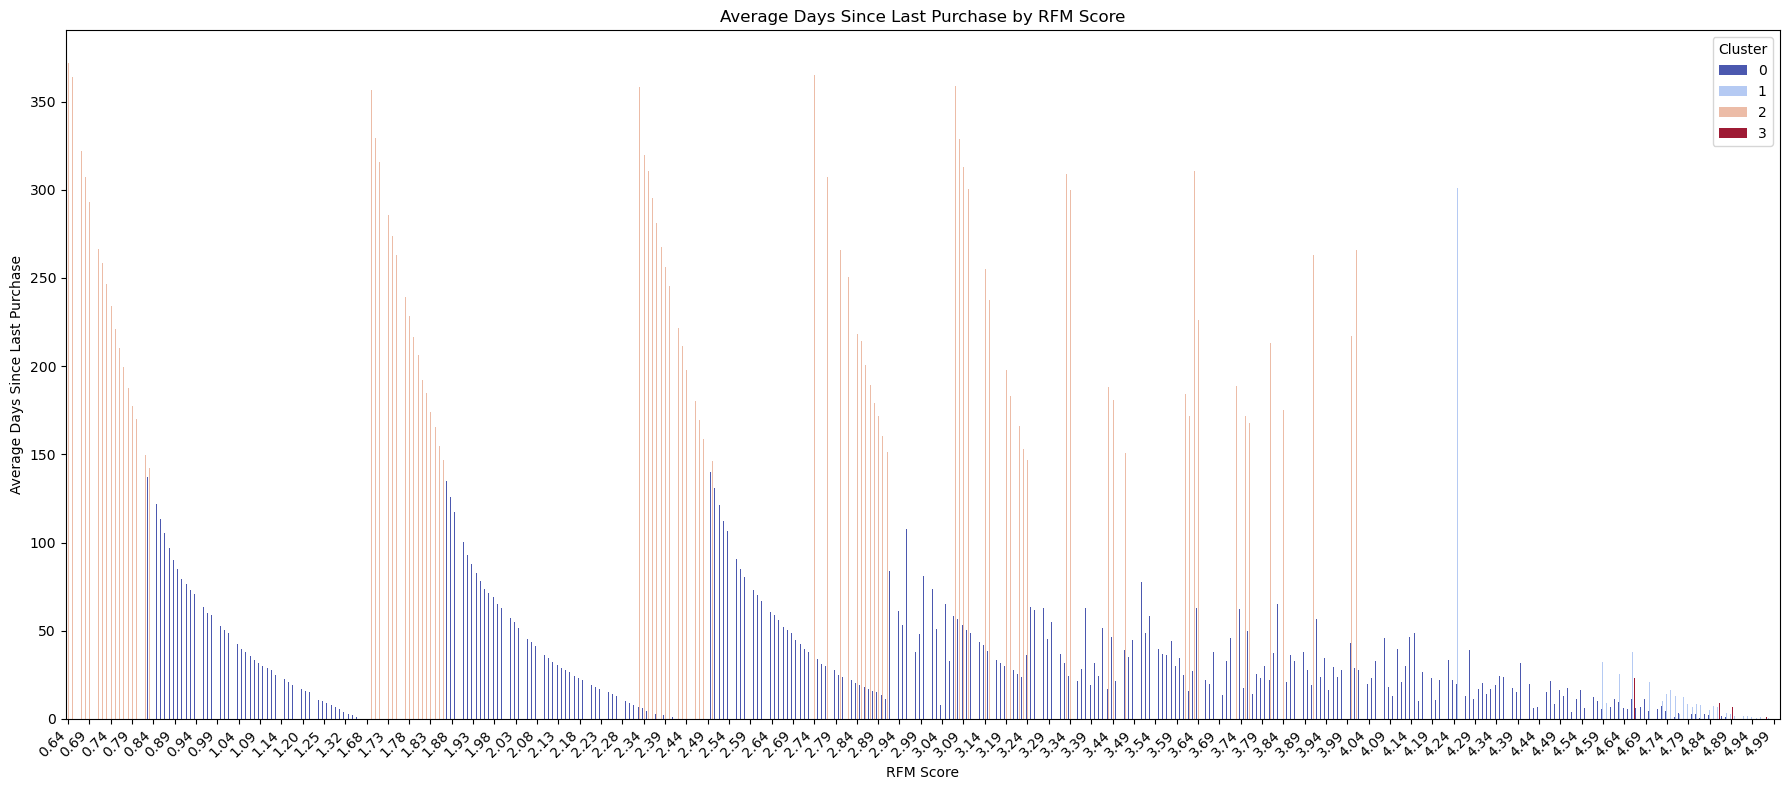

In [302]:
sd = rfm.groupby(['Cluster', 'RFM_Score']).agg({
    'Recency': 'mean',
    'Quantity': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Average_Transaction_Value': 'mean',
}).reset_index()

# Visualize the data
plt.figure(figsize=(18, 8))
sns.barplot(x='RFM_Score', y='Recency', hue='Cluster', data=sd, palette='coolwarm')
plt.title('Average Days Since Last Purchase by RFM Score')
plt.xlabel('RFM Score')

# Adjust x-axis ticks and labels
plt.xticks(np.arange(0, len(sd['RFM_Score'].unique()), 5), 
           [f'{x:.2f}' for x in sorted(sd['RFM_Score'].unique())][::5],
           rotation=45, ha='right')

plt.ylabel('Average Days Since Last Purchase')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

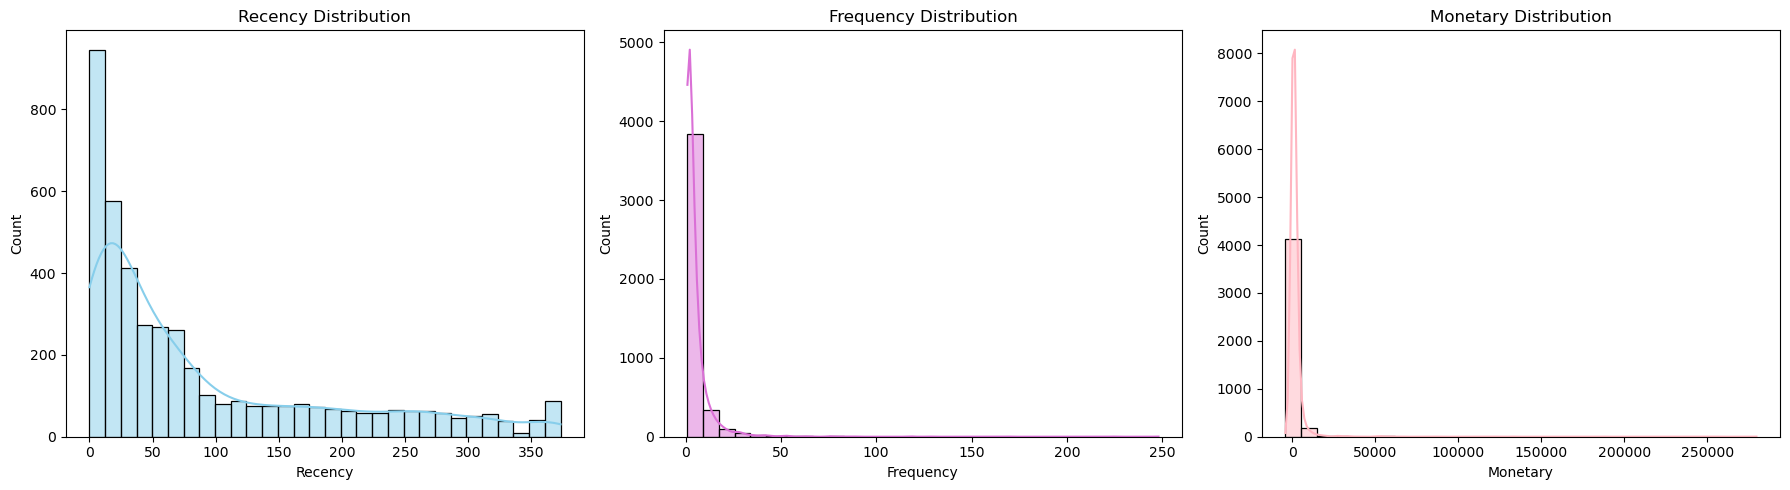

,Cluster,Recency,Average_Products_Purchased,Average_Transactions,Average_Spend,Average_Transaction_Value,Customer_Count
0,0,40.606500,899.191228,4.802461,1472.653250,inf,3169
1,1,8.181818,11121.772727,40.672727,18435.663364,2.000482,110
2,2,246.951242,256.452622,1.805888,451.802990,inf,1087
3,3,6.666667,90192.500000,89.000000,182108.075000,2.240408,6


In [304]:
plt.figure(figsize=(18, 5))

# Recency distribution
plt.subplot(131)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='#87CEEB')
plt.title('Recency Distribution')
plt.xlabel('Recency')

# Frequency distribution
plt.subplot(132)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='#DA70D6')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

# Monetary distribution
plt.subplot(133)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='#FFB6C1')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

# Group customers by their assigned clusters
cs = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Quantity': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Average_Transaction_Value': 'mean',
    'CustomerID': 'count'  
}).reset_index()

# Rename columns for clarity
cs = cs.rename(columns={
    'Days_Since_Last_Purchase': 'Average_Recency',
    'Quantity': 'Average_Products_Purchased',
    'Frequency': 'Average_Transactions',
    'Monetary': 'Average_Spend',
    'Average_Transaction_Value': 'Average_Transaction_Value',
    'CustomerID': 'Customer_Count'
})

cs

## 1. Data Overview

In [168]:
# Size of the dataset 
num_rows, num_columns = df.shape
print(f"Size of the dataset: {num_rows} rows and {num_columns} columns")
print("\n")

# Description of each column
column_descriptions = df.describe(include='all')
print("Column Descriptions:")
print(column_descriptions)
print("\n")

# Time period covered by the dataset
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()
print(f"Time period covered by the dataset: From {start_date} to {end_date}")

Size of the dataset: 401604 rows and 9 columns


Column Descriptions:
       InvoiceNo StockCode                         Description       Quantity  \
count     401604    401604                              401604  401604.000000   
unique     22190      3684                                3896            NaN   
top       576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq         542      2065                                2058            NaN   
mean         NaN       NaN                                 NaN      12.183273   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       2.000000   
50%          NaN       NaN                                 NaN       5.000000   
75%          NaN       NaN                                 NaN      12.000000   
max          NaN       NaN                                 NaN   80995.000000   
std          NaN       NaN             

## 2. Customer Analysis

Number of unique customers: 4372
Distribution of orders per customer:
CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: count, Length: 4372, dtype: int64


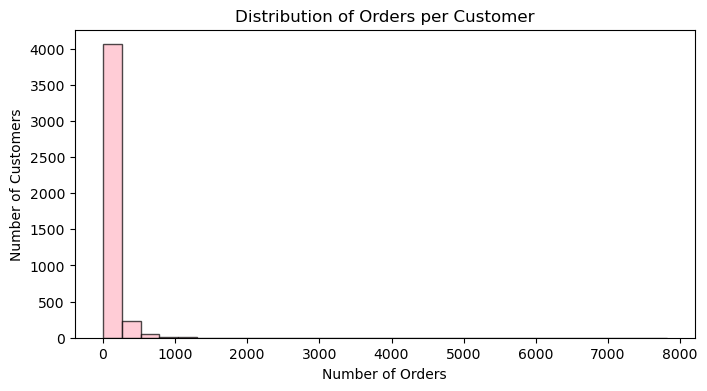

Top 5 customers with the most purchases by order count:
CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
Name: count, dtype: int64


In [308]:
# Unique Customers
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

# Distribution of the number of orders per customer
orders_per_customer = df['CustomerID'].value_counts()
print("Distribution of orders per customer:")
print(orders_per_customer)

plt.figure(figsize=(8, 4))
plt.hist(orders_per_customer, bins=30, edgecolor='k', alpha=0.7, color = '#FFB7C5')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Top 5 customers with the most purchases by order count
top_5_customers = orders_per_customer.head(5)
print("Top 5 customers with the most purchases by order count:")
print(top_5_customers)

## 3. Product Analysis

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64




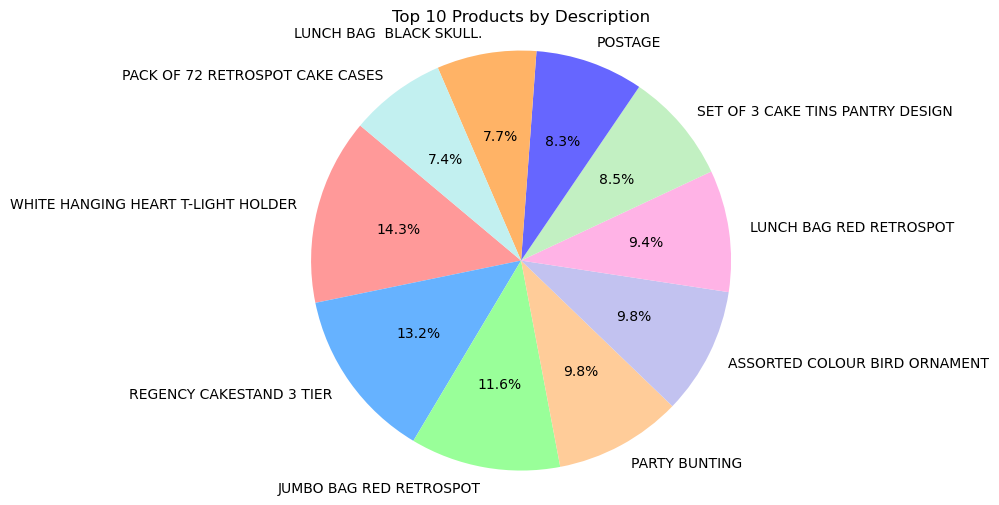

Average Price of Products: Description
 4 PURPLE FLOCK DINNER CANDLES       2.312162
 50'S CHRISTMAS GIFT BAG LARGE       1.248091
 DOLLY GIRL BEAKER                   1.243796
 I LOVE LONDON MINI BACKPACK         4.138406
 I LOVE LONDON MINI RUCKSACK         4.150000
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.836888
ZINC TOP  2 DOOR WOODEN SHELF       16.768182
ZINC WILLIE WINKIE  CANDLE STICK     0.872344
ZINC WIRE KITCHEN ORGANISER          7.175000
ZINC WIRE SWEETHEART LETTER TRAY     3.454000
Name: UnitPrice, Length: 3896, dtype: float64


StockCode with the Highest Revenue: REGENCY CAKESTAND 3 TIER
Total Revenue: 132567.69999999998




In [182]:
# top 10 most frequently purchased products
product_counts = df['Description'].value_counts()
top_10_products = product_counts.head(10)
print(top_10_products)
print("\n")

plt.figure(figsize=(8, 6))
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#6666ff', '#ffb366', '#c2f0f0']
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')  
plt.title('Top 10 Products by Description')
plt.show()

# average price of products
average_price = df.groupby('Description')['UnitPrice'].mean()
print("Average Price of Products:", average_price)
print("\n")

# the total revenue for each category
df['Total_Spend']=df['UnitPrice']*df['Quantity']
product_revenue = df.groupby('Description')['Total_Spend'].sum()
highest_revenue_stock = product_revenue.idxmax()
highest_revenue = product_revenue.max()
print("StockCode with the Highest Revenue:", highest_revenue_stock)
print("Total Revenue:", highest_revenue)
print("\n")

## 4. Time Analysis

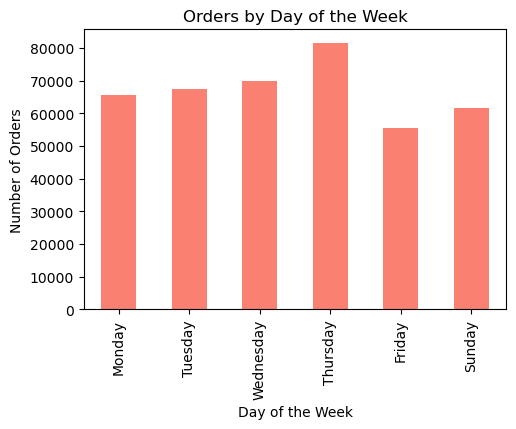

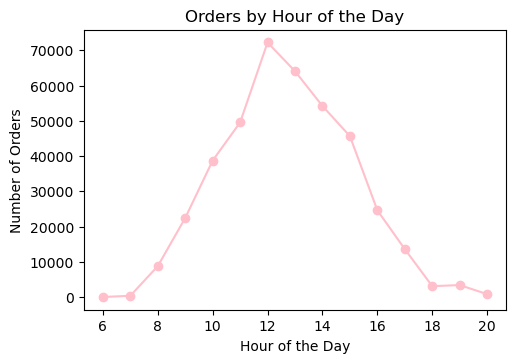

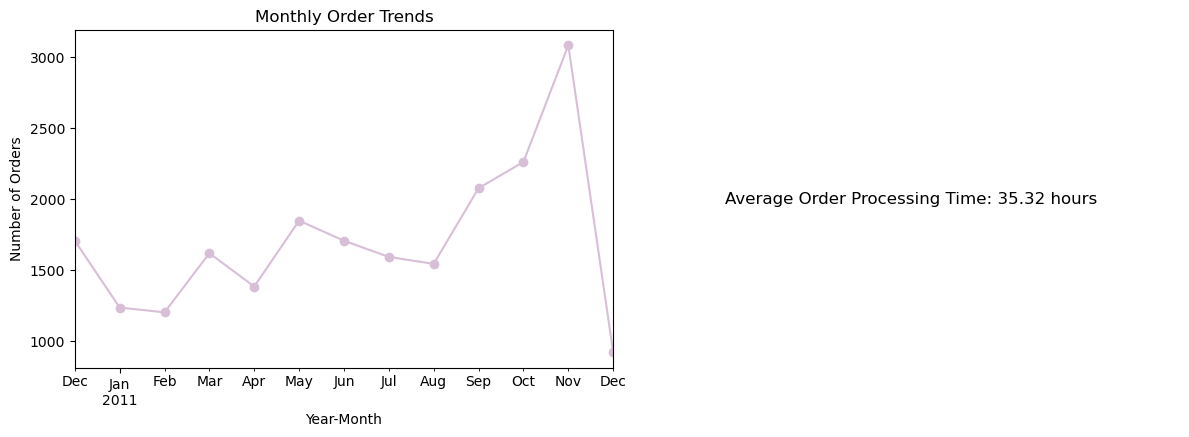

In [320]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['OrderDay'] = df['InvoiceDate'].dt.date
df['OrderTime'] = df['InvoiceDate'].dt.time
df['OrderHour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  

orders_by_day_of_week = df['DayOfWeek'].value_counts().sort_index()
orders_by_hour = df['OrderHour'].value_counts().sort_index()

plt.figure(figsize=(12, 8))

#day of the week with the most orders
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

orders_by_day_of_week.index = orders_by_day_of_week.index.map(day_mapping)
plt.subplot(221)
orders_by_day_of_week.plot(kind='bar', color='#FA8072')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

# hour of the day with the most orders
plt.figure(figsize=(12, 8))
plt.subplot(222)
orders_by_hour.plot(kind='line', marker='o', color='pink')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')

# Average order processing time
df['OrderProcessTime'] = (df['InvoiceDate'] - df.groupby('CustomerID')['InvoiceDate'].shift(1)).dt.total_seconds() / 3600
average_process_time = df['OrderProcessTime'].mean()

# Display the average order processing time
plt.figure(figsize=(12, 8))
plt.subplot(224)
plt.text(0.5, 0.5, f'Average Order Processing Time: {average_process_time:.2f} hours',
         fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.axis('off')

#seasonal trends (monthly) in the dataset
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_order_count = df.groupby('YearMonth')['InvoiceNo'].nunique()

# Plot seasonal trends (monthly)
plt.subplot(223)
monthly_order_count.plot(kind='line', marker='o', color='#D8BFD8')
plt.title('Monthly Order Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')

plt.tight_layout()

## 5. Geographical Analysis

Top 5 countries with highest number of orders
Country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 5 Countries by Orders')

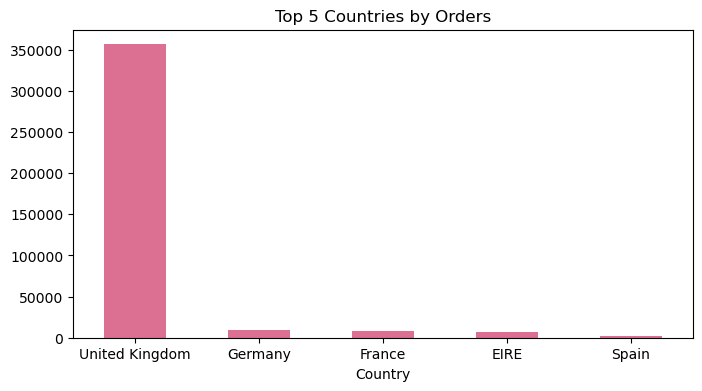

In [334]:
orders_by_country = df['Country'].value_counts()
avgc = df.groupby('Country')['Total_Spend'].mean()
print("Top 5 countries with highest number of orders")
top_5_countries = orders_by_country.head(5)
print(top_5_countries)

plt.figure(figsize=(8, 4))
top_5_countries.plot(kind='bar', color= '#DB7093')
plt.xticks(rotation = 0)
plt.title('Top 5 Countries by Orders')

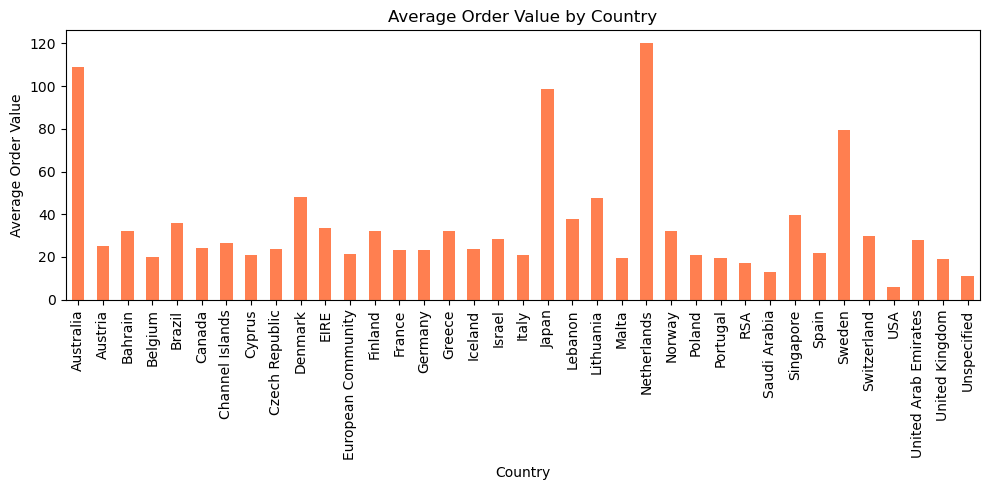

Correlation between Country and Average Order Value:
Country
Australia               108.910787
Austria                  25.322494
Bahrain                  32.258824
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.520991
Cyprus                   21.045434
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     33.445054
European Community       21.176230
Finland                  32.124806
France                   23.200714
Germany                  23.365978
Greece                   32.263836
Iceland                  23.681319
Israel                   28.293117
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal                 19.7

In [206]:
correlation = df.groupby('Country').apply(lambda group: group['Total_Spend'].corr(group.count()))
plt.figure(figsize=(10, 5))
avgc.plot(kind='bar', color='coral')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()

print(f'Correlation between Country and Average Order Value:\n{avgc}')

## 6. Payment Analysis

In [212]:
payment_methods = ['Credit Card', 'Debit Card', 'Zelle', 'Apple Pay']
random_payment_methods = [random.choice(payment_methods) for _ in range(len(df))]
df['Payment Method'] = random_payment_methods

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010-12-01,08:26:00,8,2,NaN,2010-12,Apple Pay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Apple Pay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Zelle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card


In [220]:
payment_counts = df.groupby('Payment Method')['CustomerID'].count()
max_payment_method = payment_counts.idxmax()

print("Payment Method with the maximum count:", max_payment_method)

Payment Method with the maximum count: Credit Card


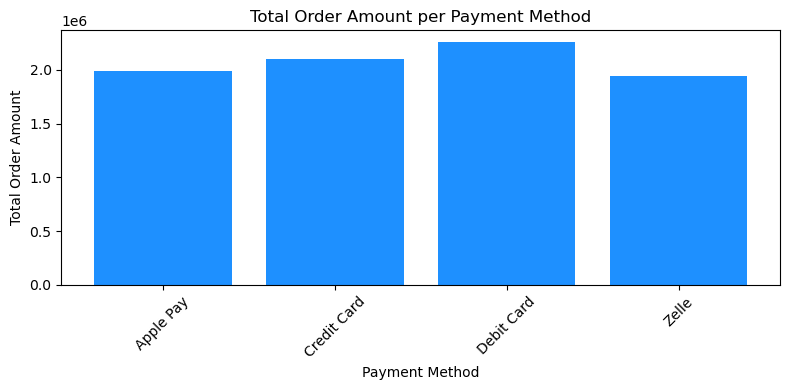

In [346]:
total_order_amount_per_payment = df.groupby('Payment Method')['Total_Spend'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.bar(total_order_amount_per_payment['Payment Method'], total_order_amount_per_payment['Total_Spend'], color = '#1E90FF')
plt.xlabel('Payment Method')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount per Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Customer Behavior

In [222]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
customer_activity = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])

#average duration of customer activity
customer_activity['ActivityDuration'] = (customer_activity['max'] - customer_activity['min']).dt.days.mean()

print(f'Average Duration of Customer Activity: {customer_activity["ActivityDuration"].mean()} days')

#recency and frequency 
recency = (customer_activity['max'].max() - customer_activity['max']).dt.days
frequency = df['CustomerID'].value_counts()
customer_segments = pd.DataFrame({'Recency': recency, 'Frequency': frequency})

# segment thresholds 
recency_threshold = customer_segments['Recency'].median()
frequency_threshold = customer_segments['Frequency'].median()
print("recency_threshold: ",recency_threshold)
print("frequency_threshold: ",frequency_threshold)

# Assign segments 
customer_segments['Segment'] = 'Low Activity'
customer_segments.loc[(customer_segments['Recency'] <= recency_threshold) & (customer_segments['Frequency'] > frequency_threshold), 'Segment'] = 'High Activity'

print('\nCustomer Segments:')
print(customer_segments)

Average Duration of Customer Activity: 133.38586459286367 days
recency_threshold:  49.0
frequency_threshold:  41.0

Customer Segments:
            Recency  Frequency        Segment
CustomerID                                   
12346.0         325          2   Low Activity
12347.0           1        182  High Activity
12348.0          74         31   Low Activity
12349.0          18         73  High Activity
12350.0         309         17   Low Activity
...             ...        ...            ...
18280.0         277         10   Low Activity
18281.0         180          7   Low Activity
18282.0           7         13   Low Activity
18283.0           3        721  High Activity
18287.0          42         70  High Activity

[4372 rows x 3 columns]


## 8. Returns or Refunds

In [226]:
returns = df[df['Quantity'] < 0]

# percentage of returns or refunds
total_orders = len(df)
orders_returned = len(returns)
percentage = (orders_returned / total_orders) * 100

print(f'Percentage of Orders with Returns or Refunds: {percentage:.2f}%')

# Group the returns by product category
return_category = returns.groupby('Description')['InvoiceNo'].count()
total_order_category = df.groupby('Description')['InvoiceNo'].count()

# percentage of returns for each category
percentage_return_category = (return_category / total_order_category) * 100

print('Percentage of Returns by Product Category:')
percentage_return_category

Percentage of Orders with Returns or Refunds: 2.21%
Percentage of Returns by Product Category:


Description
 4 PURPLE FLOCK DINNER CANDLES            NaN
 50'S CHRISTMAS GIFT BAG LARGE       0.909091
 DOLLY GIRL BEAKER                   1.459854
 I LOVE LONDON MINI BACKPACK              NaN
 I LOVE LONDON MINI RUCKSACK              NaN
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      1.244813
ZINC TOP  2 DOOR WOODEN SHELF       18.181818
ZINC WILLIE WINKIE  CANDLE STICK     0.520833
ZINC WIRE KITCHEN ORGANISER               NaN
ZINC WIRE SWEETHEART LETTER TRAY          NaN
Name: InvoiceNo, Length: 3896, dtype: float64

In [230]:
not_returned_orders=df[df['Quantity'] > 0]
not_returned_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth,Payment Method
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,2010-12-01,08:26:00,8,2,NaN,2010-12,Apple Pay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Apple Pay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Zelle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,2010-12-01,08:26:00,8,2,0.0,2010-12,Debit Card


In [232]:
not_returned_orders = not_returned_orders.groupby('Description')['Quantity'].sum()
not_returned_orders = not_returned_orders.to_frame().reset_index()
not_returned_orders.head()

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,138
1,50'S CHRISTMAS GIFT BAG LARGE,1885
2,DOLLY GIRL BEAKER,2394
3,I LOVE LONDON MINI BACKPACK,359
4,I LOVE LONDON MINI RUCKSACK,1


In [234]:
returned_orders= returns.groupby('Description')['Quantity'].sum()
returned_orders= returned_orders.to_frame().reset_index()
returned_orders

,Description,Quantity
0,50'S CHRISTMAS GIFT BAG LARGE,-2
1,DOLLY GIRL BEAKER,-7
2,OVAL WALL MIRROR DIAMANTE,-5
3,SET 2 TEA TOWELS I LOVE LONDON,-8
4,SPACEBOY BABY GIFT SET,-6
...,...,...
1940,ZINC SWEETHEART WIRE LETTER RACK,-4
1941,ZINC T-LIGHT HOLDER STAR LARGE,-11
1942,ZINC T-LIGHT HOLDER STARS SMALL,-44
1943,ZINC TOP 2 DOOR WOODEN SHELF,-5


In [236]:
merged_data = not_returned_orders.merge(returned_orders, on='Description', how='left', suffixes=('_ordered', '_returned'))

# Calculate the correlation between product category and return percentage
correlation = merged_data[['Quantity_ordered', 'Quantity_returned']].corr().iloc[0::2,-1]

print("Correlation between Product Category and Likelihood of Returns:")
print(correlation)

Correlation between Product Category and Likelihood of Returns:
Quantity_ordered   -0.581692
Name: Quantity_returned, dtype: float64


## 9. Profitability Analysis

In [240]:
#randomly generating Unit Price for calculating cost price
random.seed(42) 
valid_quantity_df = df[df['Quantity'] >= 0]
valid_quantity_df['CostUnitPrice'] = valid_quantity_df['UnitPrice'] * (1 - (random.uniform(0, 0.1)))
valid_quantity_df['CostUnitPrice']=valid_quantity_df['CostUnitPrice'].round(2)
valid_quantity_df['CostPrice']=valid_quantity_df['CostUnitPrice']*valid_quantity_df['Quantity']
valid_quantity_df['Profit']=valid_quantity_df['Total_Spend']-valid_quantity_df['CostPrice']
Total_profit_generated=valid_quantity_df['Profit'].sum()

print("Total profit generated: ")
print(Total_profit_generated)

print("Top 5 products with higher profits: ")
sorted_df = valid_quantity_df.sort_values(by=['Profit'], ascending=[False])
sorted_df.head(5)

Total profit generated: 
568057.0240000001
Top 5 products with higher profits: 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Total_Spend,OrderDay,OrderTime,OrderHour,DayOfWeek,OrderProcessTime,YearMonth,Payment Method,CostUnitPrice,CostPrice,Profit
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,168469.60,2011-12-09,09:15:00,9,4,4919.383333,2011-12,Debit Card,1.95,157940.25,10529.35
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,77183.60,2011-01-18,10:01:00,10,1,NaN,2011-01,Zelle,0.97,71988.55,5195.05
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,38970.00,2011-06-10,15:28:00,15,4,0.100000,2011-06,Credit Card,607.97,36478.20,2491.80
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,8142.75,2011-05-03,13:46:00,13,1,0.916667,2011-05,Debit Card,7622.08,7622.08,520.67
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,7144.72,2011-09-20,11:05:00,11,1,0.000000,2011-09,Zelle,4.74,6692.88,451.84


## 10. Customer Satisfaction

Most frequently bought products:
                          Description  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390
5             LUNCH BAG RED RETROSPOT   1303
6   SET OF 3 CAKE TINS PANTRY DESIGN    1152
7                             POSTAGE   1099
8             LUNCH BAG  BLACK SKULL.   1078
9     PACK OF 72 RETROSPOT CAKE CASES   1050


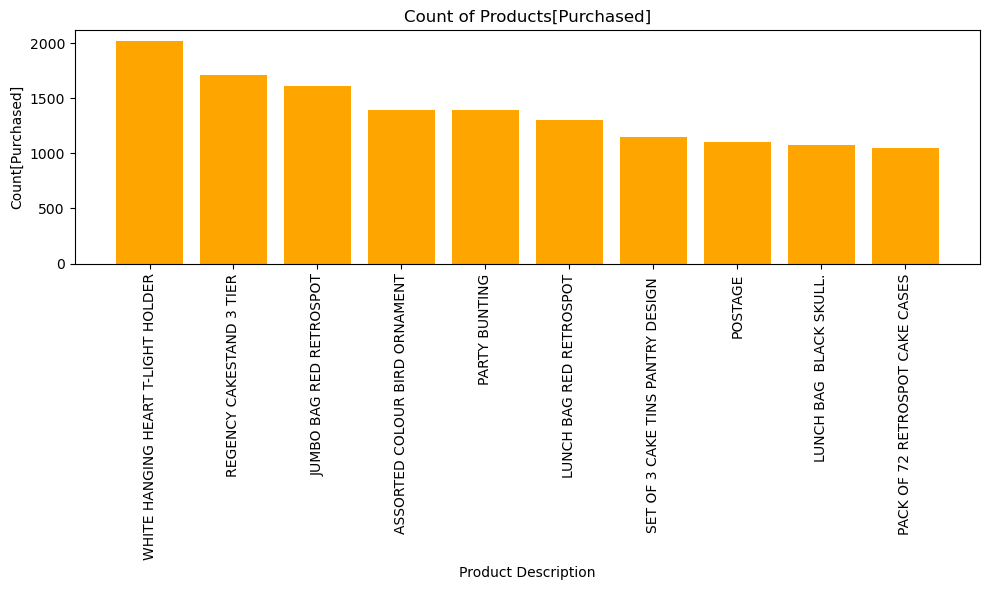

In [246]:
#satisfaction based upon the frequency of purchase
top_frequency_products = valid_quantity_df['Description'].value_counts()
top_frequency_products=top_frequency_products.to_frame().reset_index()
print("Most frequently bought products:")
top_products=top_frequency_products.head(10)
print(top_products)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_products['Description'], top_products['count'], color='orange')
plt.xlabel('Product Description')
plt.ylabel('Count[Purchased]')
plt.title('Count of Products[Purchased]')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Most frequently retuned products:
                Description  count
0  REGENCY CAKESTAND 3 TIER    180
1                    Manual    175
2                   POSTAGE     97
3  JAM MAKING SET WITH JARS     86
4                  Discount     77


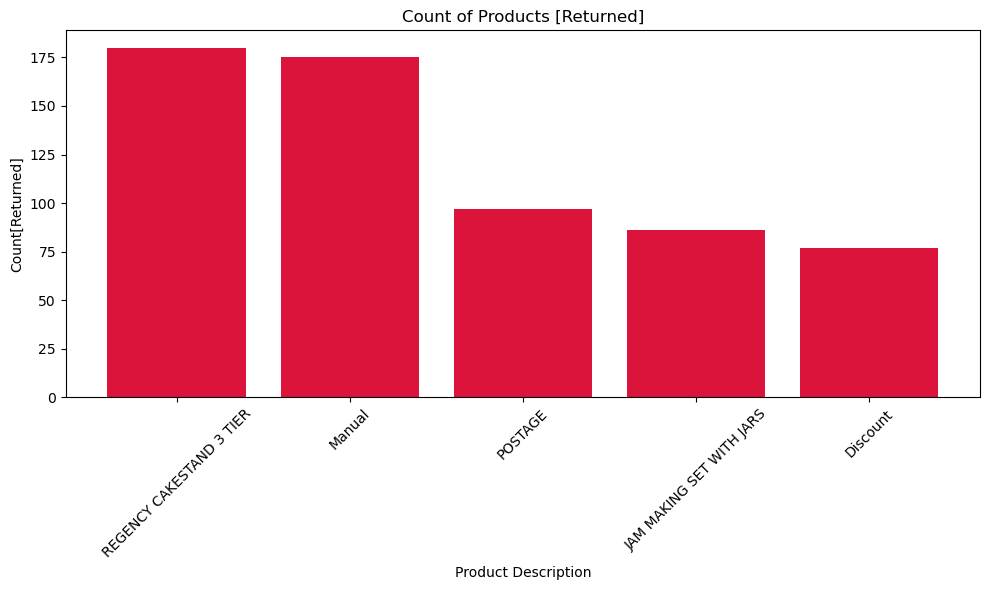

In [350]:
#dissatisfaction - where quantity contains negative values
returned_df = df[df['Quantity']<0]
mostly_Returned_items = returned_df['Description'].value_counts()
mostly_Returned_items=mostly_Returned_items.to_frame().reset_index()
print("Most frequently retuned products:")
returned_products=mostly_Returned_items.head(5)
print(returned_products)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(returned_products['Description'], returned_products['count'], color='#DC143C')
plt.xlabel('Product Description')
plt.ylabel('Count[Returned]')
plt.title('Count of Products [Returned]')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()